In [ ]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.4.2" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools Plots"
JULIA_PACKAGES_IF_GPU="CuArrays"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -n "$COLAB_GPU" ] && [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  if [ "$COLAB_GPU" = "1" ]; then
      JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"'
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia  

  echo ''
  echo "Success! Please reload this page and jump to the next section."
fi

Installing Julia 1.4.2 on the current Colab Runtime...
2020-07-12 05:45:21 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz [99093958/99093958] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
    Cloning default registries into `~/.julia`
    Cloning registry from "https://github.com/JuliaRegistries/General.git"
      Added registry `General` to `~/.julia/registries/General`
  Resolving package versions...
  Installed MbedTLS_jll ───── v2.16.6+1
  Installed Parsers ───────── v1.0.7
  Installed JSON ──────────── v0.21.0
  Installed ZeroMQ_jll ────── v4.3.2+4
  Installed Conda ─────────── v1.4.1
  Installed IJulia ────────── v1.21.2
  Installed SoftGlobalScope ─ v1.0.10
  Installed VersionParsing ── v1.2.0
  Installed ZMQ ───────────── v1.2.1
  Installed MbedTLS ───────── v1.0.2
######################################################################## 100.0%
#######################################################################

# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [ ]:
using Pkg
Pkg.add("Metalhead")


In [2]:
using Metalhead                 #this library has all the pretrained models
using Metalhead: classify

┌ Info: Precompiling Metalhead [dbeba491-748d-5e0e-a39e-b530a07fa0cc]
└ @ Base loading.jl:1260


######################################################################### 100.0%


┌ Warning: `haskey(::TargetIterator, name::String)` is deprecated, use `Target(; name = name) !== nothing` instead.
│   caller = llvm_compat(::VersionNumber) at compatibility.jl:176
└ @ CUDAnative ~/.julia/packages/CUDAnative/C91oY/src/compatibility.jl:176


######################################################################### 100.0%


######################################################################### 100.0%


┌ Warning: `haskey(::TargetIterator, name::String)` is deprecated, use `Target(; name = name) !== nothing` instead.
│   caller = llvm_compat(::VersionNumber) at compatibility.jl:176
└ @ CUDAnative /root/.julia/packages/CUDAnative/C91oY/src/compatibility.jl:176


In [10]:
Pkg.add("ImageMagick")     # to display image

  Resolving package versions...
  Installed Zstd_jll ──────── v1.4.5+0
  Installed Libtiff_jll ───── v4.1.0+0
  Installed ImageMagick_jll ─ v6.9.10-12+3
  Installed JpegTurbo_jll ─── v2.0.1+1
  Installed libpng_jll ────── v1.6.37+3
  Installed ImageMagick ───── v1.1.5
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################### 100.0%
######################################################################### 100.0%
   Updating `~/.julia/environments/v1.4/Project.toml`
  [6218d12a] + ImageMagick v1.1.5
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [6218d12a] + ImageMagick v1.1.5
  [c73af94c] + ImageMagick_jll v6.9.10-12+3
  [aacddb02] + JpegTurbo_jll v2.0.1+1
  [89763e89] + Libtiff_jll v4.1.0+0
  [3161d3a3] + Zstd_jll v1.4.5+

In [11]:
using ImageMagick

┌ Info: Precompiling ImageMagick [6218d12a-5da1-5696-b52f-db25d2ecc6d1]
└ @ Base loading.jl:1260


In [4]:
Pkg.add("Images")

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
  [916415d5] + Images v0.22.4
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]


In [5]:
using Images

In [6]:
download("http://www.mikebirkhead.com/images/EyeForAnElephant.jpg","elephant.jpg")

"elephant.jpg"

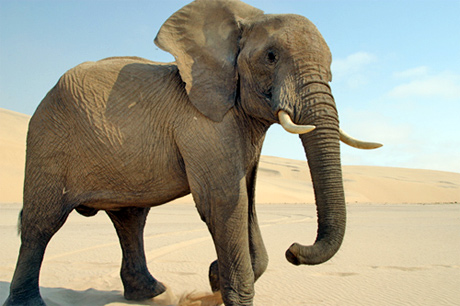

In [12]:
image = load("/content/elephant.jpg")     #load image

In [17]:
vgg=VGG19()    #vgg19 pretrained model

VGG19()

In [18]:
classify(vgg,image)      #classifying image with pretrained model

"African elephant, Loxodonta africana"

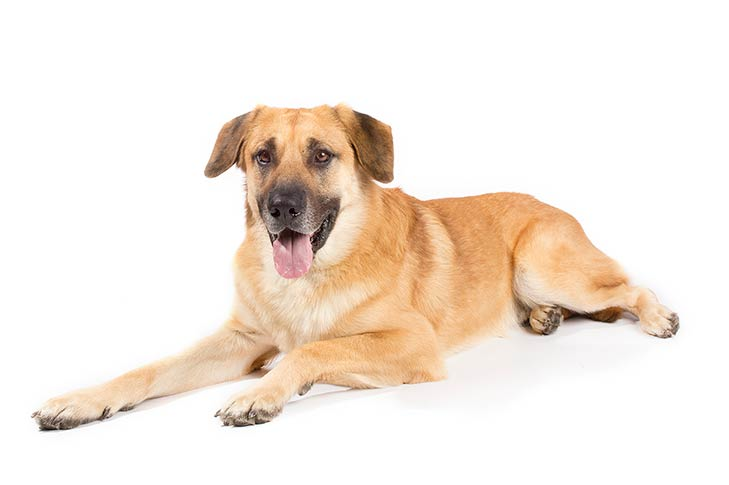

In [20]:
img=load("/content/sample_data/Chinook-On-White-03.jpg")

In [21]:
classify(vgg,img)

"Labrador retriever"

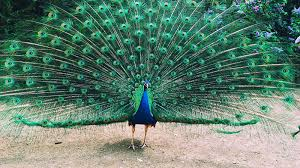

In [22]:
img2=load("/content/sample_data/download.jpg")

In [23]:
classify(vgg,img2)

"peacock"